In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as sts 
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')
# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

# pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [2]:
# task 1

train = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTrain_Data_Practice.csv', index_col = 'date', parse_dates = True)
test = pd.read_csv('DS3_C1_S3_DailyDelhiClimateTest_Data_Practice.csv', index_col = 'date', parse_dates = True)

In [3]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [4]:
test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [5]:
train.shape

(1462, 4)

In [6]:
test.shape

(114, 4)

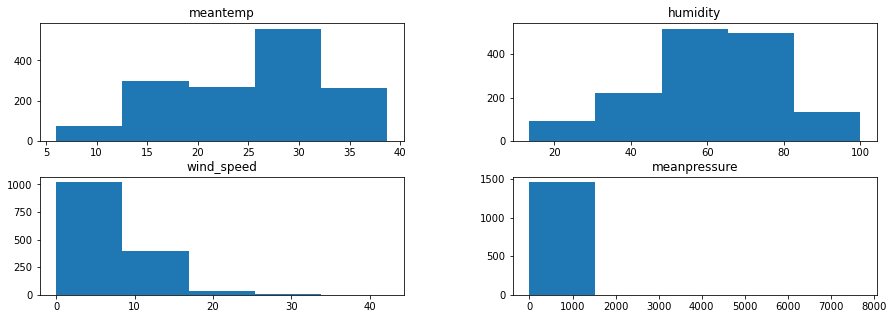

In [7]:
train.hist(grid = False, bins = 5, figsize=(15, 5));

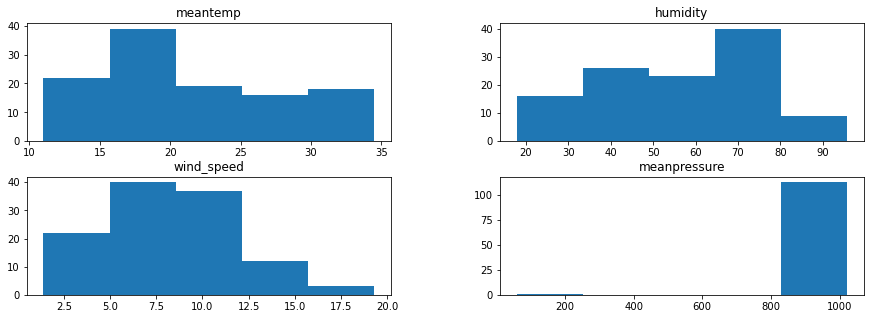

In [8]:
test.hist(grid = False, bins = 5, figsize=(15, 5));

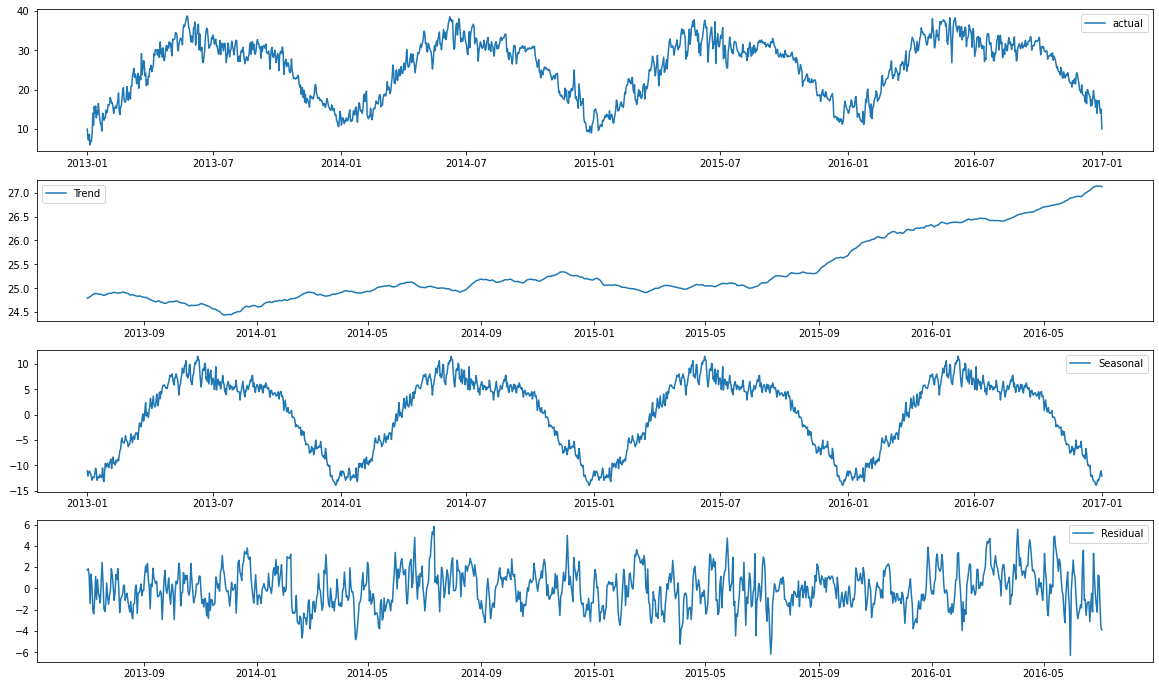

In [9]:
decomposition = seasonal_decompose(train['meantemp'], period = 365)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(train['meantemp'],label='actual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

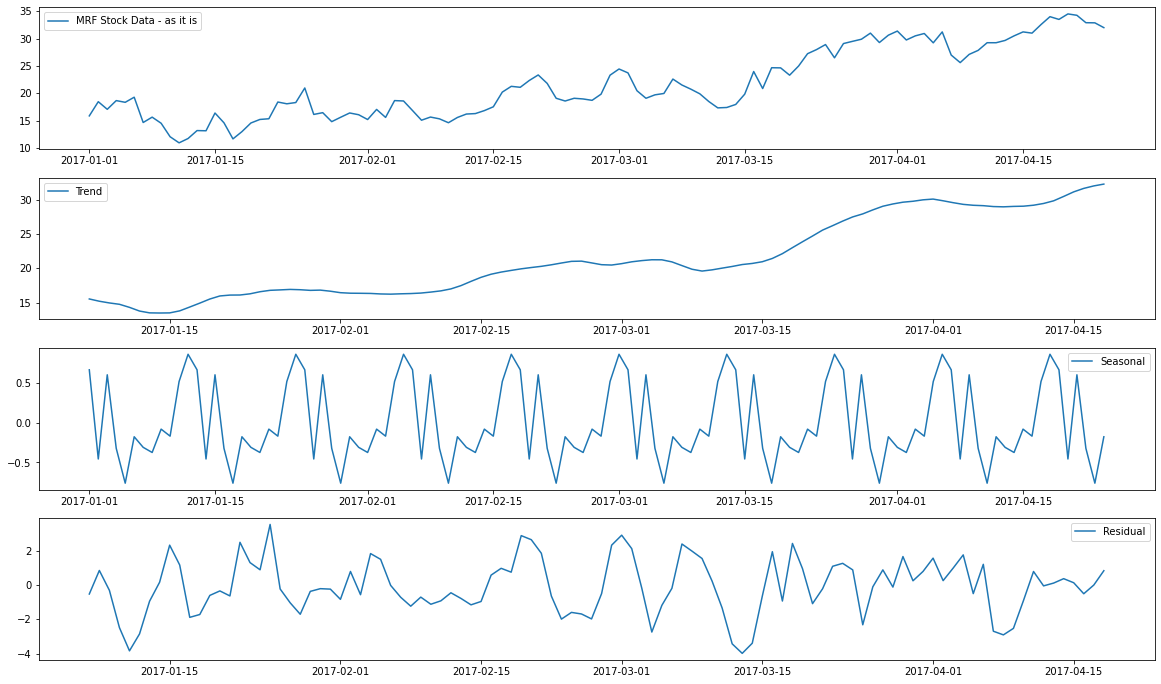

In [10]:
decomposition = seasonal_decompose(test['meantemp'], period = 12)
d_trend = decomposition.trend
d_seasonal = decomposition.seasonal
d_residual = decomposition.resid

# plotting all the 4 graphs
fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(test['meantemp'],label='actual')
plt.legend()

plt.subplot(412)
plt.plot(d_trend,label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(d_residual,label='Residual')
plt.legend(loc='best')

In [11]:
data = train['meantemp']

def simplesmooting(data, alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    pdct = model.fittedvalues
    
    dff = pd.DataFrame({'actual': data, 'forecast': pdct})
    return model, dff

dff = simplesmooting(data, 0.5)
dff 

(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x2912e369a30>,
                actual   forecast
 date                            
 2013-01-01  10.000000   8.726431
 2013-01-02   7.400000   9.363215
 2013-01-03   7.166667   8.381608
 2013-01-04   8.666667   7.774137
 2013-01-05   6.000000   8.220402
 ...               ...        ...
 2016-12-28  17.217391  16.585003
 2016-12-29  15.238095  16.901197
 2016-12-30  14.095238  16.069646
 2016-12-31  15.052632  15.082442
 2017-01-01  10.000000  15.067537
 
 [1462 rows x 2 columns])

In [12]:
alphas = [0, 0.2, 0.6, 0.8]
d_simple_exp = {}
models = []
for a in alphas:
    m, df = simplesmooting(data, a)
    d_simple_exp[a] = df.forecast
    models.append(m)
for i in range(len(alphas)):
    print(d_simple_exp[alphas[i]])

date
2013-01-01    25.495521
2013-01-02    25.495521
2013-01-03    25.495521
2013-01-04    25.495521
2013-01-05    25.495521
                ...    
2016-12-28    25.495521
2016-12-29    25.495521
2016-12-30    25.495521
2016-12-31    25.495521
2017-01-01    25.495521
Name: forecast, Length: 1462, dtype: float64
date
2013-01-01     8.985582
2013-01-02     9.188466
2013-01-03     8.830773
2013-01-04     8.497951
2013-01-05     8.531694
                ...    
2016-12-28    16.833339
2016-12-29    16.910149
2016-12-30    16.575739
2016-12-31    16.079638
2017-01-01    15.874237
Name: forecast, Length: 1462, dtype: float64
date
2013-01-01     8.966704
2013-01-02     9.586682
2013-01-03     8.274673
2013-01-04     7.609869
2013-01-05     8.243948
                ...    
2016-12-28    16.653539
2016-12-29    16.991851
2016-12-30    15.939597
2016-12-31    14.832982
2017-01-01    14.964772
Name: forecast, Length: 1462, dtype: float64
date
2013-01-01     9.478756
2013-01-02     9.895751
2013-

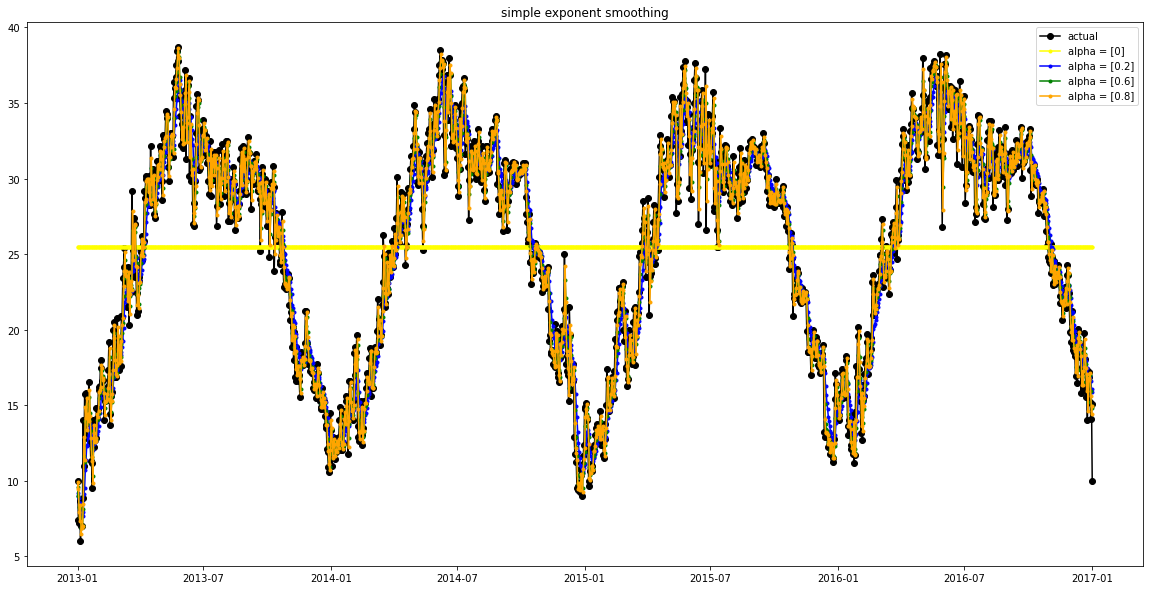

In [13]:
colors = ['yellow', 'blue', 'green', 'orange']
fig,ax = plt.subplots(1, 1, figsize=(20, 10))
plt.plot(data, marker = 'o', color = 'black', label = 'actual')
for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]], marker = '.', color = colors[i], label = f'alpha = {[alphas[i]]}') 
plt.title('simple exponent smoothing')
plt.legend()

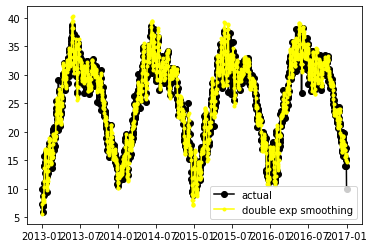

In [14]:
# double

alpha = 0.25
beta = 0.45 # rand vals
model2 = ExponentialSmoothing(data, trend = 'additive').fit(smoothing_level=alpha, smoothing_trend=beta)
f_dexp = model2.fittedvalues
model2.forecast(12)
plt.plot(data, marker = 'o', color = 'black', label = 'actual')
plt.plot(f_dexp, marker = '.', color = 'yellow', label = 'double exp smoothing')
plt.legend()

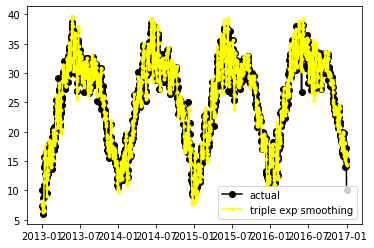

In [15]:
# triple

alpha = 0.37
beta = 0.5
gamma = 0.15
model3 = ExponentialSmoothing(data, trend = 'add', seasonal = 'add').fit(smoothing_level=alpha, smoothing_trend=beta)
predicted_model3 = model3.fittedvalues
model3.forecast(12)
plt.plot(data, marker = 'o', color = 'black', label = 'actual')
plt.plot(predicted_model3, marker = '.', color = 'yellow', label = 'triple exp smoothing')
plt.legend()

In [16]:
# task 2

def checkstationary(data):
    pvalue = adfuller(data['meantemp'].resample('M').mean())[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = 'Data is Stationary'  
    else:
        msg = 'Data is not stationary'
    return msg
checkstationary(train)

0.7360356050589134


'Data is not stationary'

In [17]:
for i in range(1,25):
    train_diff = train[['meantemp']] - train[['meantemp']].shift(i)
    train_diff.dropna(inplace = True)
    if checkstationary(train_diff) == 'Data is Stationary':
        print(f'Data is Stationary')
        break

0.9961639768687364
0.832633751803775
0.8001525922094427
0.8598575688115038
0.7104960335663006
0.6279484900546106
0.02061888262305328
Data is Stationary


In [18]:
train_diff = train_diff.resample('M').mean()
train_diff

,meantemp
date,
2013-01-31,1.850546
2013-02-28,1.146429
2013-03-31,0.944355
2013-04-30,1.908810
2013-05-31,1.012481
2013-06-30,-0.809325
2013-07-31,-0.396697
2013-08-31,0.059908
2013-09-30,-0.381032


In [19]:
for i in range(1,25):
    test_diff = test[['meantemp']] - test[['meantemp']].shift(i)
    test_diff.dropna(inplace = True)
    if checkstationary(test_diff) == 'Data is Stationary':
        print(f'Data is Stationary')
        break

0.2513816975660236
0.18944042514344073
0.3505676380124831
0.3237184137119994
0.35295128572925083
0.3673298457081711
0.5353384612724345
0.5452540067914812
0.5277994971059488
0.5612574753140805
0.5655781513486345
0.5593302147702262
0.525145536227032
0.5042194331930417
0.30872851959662717
0.3927354771940147
0.5880739666503709
0.6347921427286589
0.7099604997389672
0.47682727305686484
0.0
Data is Stationary


In [20]:
test_diff = test_diff.resample('M').mean()
test_diff

,meantemp
date,
2017-01-31,0.667748
2017-02-28,2.658785
2017-03-31,4.109988
2017-04-30,5.107357


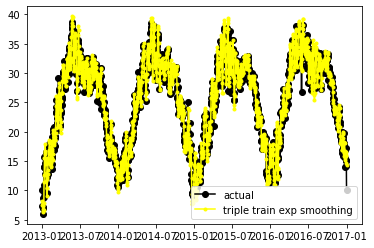

In [21]:
# smoothing using triple expo 

alpha = 0.37
beta = 0.5
gamma = 0.15
model3 = ExponentialSmoothing(train['meantemp'], trend = 'add', seasonal = 'add').fit(smoothing_level=alpha, smoothing_trend=beta)
predicted_model3train = model3.fittedvalues
model3.forecast(12)
plt.plot(train['meantemp'], marker = 'o', color = 'black', label = 'actual')
plt.plot(predicted_model3train, marker = '.', color = 'yellow', label = 'triple train exp smoothing')
plt.legend()

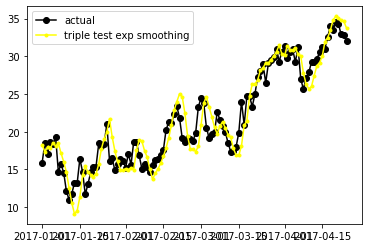

In [22]:
alpha = 0.37
beta = 0.5
gamma = 0.15
model3 = ExponentialSmoothing(test['meantemp'], trend = 'add', seasonal = 'add').fit(smoothing_level=alpha, smoothing_trend=beta)
predicted_model3test = model3.fittedvalues
model3.forecast(12)
plt.plot(test['meantemp'], marker = 'o', color = 'black', label = 'actual')
plt.plot(predicted_model3test, marker = '.', color = 'yellow', label = 'triple test exp smoothing')
plt.legend()

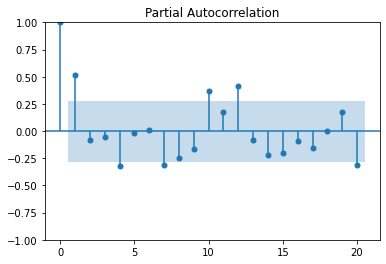

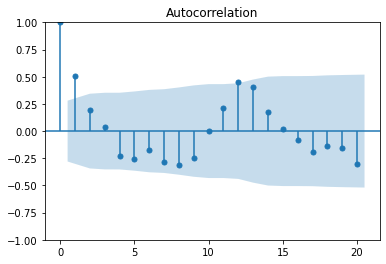

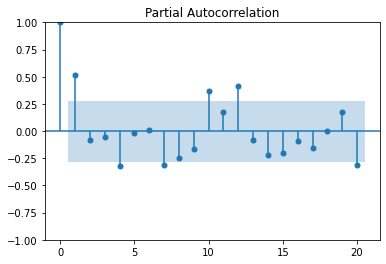

In [23]:
# task 3

plot_acf(train_diff, lags = 20)
plot_pacf(train_diff, lags = 20)

In [24]:
for i in range(1,13):
    mod=ARIMA(train_diff,order=(i,0,0))
    mfit=mod.fit()
    print(i,'for',mfit.aic)

1 for 141.9810478908591
2 for 143.1713293455914
3 for 145.15622708980752
4 for 143.22642153837606
5 for 145.22213109754168
6 for 147.21948265004167
7 for 144.2179014303576
8 for 140.76978983055025
9 for 136.85750835448505
10 for 138.79974325675704
11 for 138.08191463646588
12 for 139.85606294871525


In [25]:
for i in range(1,13):
    mod2=ARIMA(train_diff,order=(0,0,i))
    mfit2=mod2.fit()
    print(i,'for',mfit2.aic)

1 for 144.3511493472413
2 for 144.5300365339346
3 for 143.23386759916434
4 for 142.82528142795852
5 for 139.9865839688024
6 for 139.96020948869545
7 for 139.54546897659938
8 for 140.76372025999873
9 for 142.56675018180908
10 for 142.53601720988627
11 for 144.15366688991543
12 for 145.81688513446022


In [26]:
for p in range(1,13):
    for q in [1,2]:
        mod3 = ARIMA(train_diff , order = (p,0,q))
        mfit3 = mod3.fit()
        print(f'for {p} and {q}',mfit3.aic)

for 1 and 1 143.0808159647857
for 1 and 2 144.97266565219516
for 2 and 1 140.72143136701817
for 2 and 2 140.91189411141406
for 3 and 1 146.70648183023772
for 3 and 2 144.3400285171021
for 4 and 1 145.22145656622743
for 4 and 2 145.98233670301147
for 5 and 1 146.5007534256607
for 5 and 2 145.85784287210925
for 6 and 1 148.22080549103057
for 6 and 2 146.5940907023633
for 7 and 1 136.571403816226
for 7 and 2 142.91711472249887
for 8 and 1 136.2449692985168
for 8 and 2 139.3343376071083
for 9 and 1 136.27004517472193
for 9 and 2 135.71565809450098
for 10 and 1 138.75672954893233
for 10 and 2 138.58853244166744
for 11 and 1 139.47958643445264
for 11 and 2 140.2599006101404
for 12 and 1 141.45816732905277
for 12 and 2 141.5356906440117


In [27]:
mod4 = ARIMA(train_diff , order = (6,0,2))
mfit4 = mod4.fit()
mfit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                   49
Model:                 ARIMA(6, 0, 2)   Log Likelihood                 -63.297
Date:                Thu, 02 Mar 2023   AIC                            146.594
Time:                        03:44:29   BIC                            165.512
Sample:                    01-31-2013   HQIC                           153.772
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0630      0.250     -0.252      0.801      -0.553       0.427
ar.L1         -0.1835      0.264     -0.696      0.486      -0.700       0.333
ar.L2         -0.3904      0.237     -1.647      0.100      -0.855       0.074
ar.L3          0.6020      0.264      2.277      0.023       0.084       1.120
ar.L4         -0.2797      0.212     -1.321      0.187      -0.695       0.135
ar.L5         -0.2507      0.247     -1.014      0.311      -0.735       0.234
ar.L6         -0.1954      0.304     -0.643      0.520      -0.791       0.400
ma.L1          0.9317      0.486      1.915      0.055      -0.022       1.885
ma.L2          0.9769      0.988      0.989      0.323      -0.960       2.913
sigma2         0.7117      0.575      1.237      0.216      -0.416       1.839
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.90   Prob(JB):                         0.88
Heteroskedasticity (H):               1.29   Skew:                            -0.17
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# task 4

predictions = mfit4.predict(0,len(test_diff)-1)
print(predictions)

date
2013-01-31   -0.062967
2013-02-28    1.101568
2013-03-31    0.476310
2013-04-30    0.409486
Freq: M, Name: predicted_mean, dtype: float64


In [29]:
pvalue = sm.stats.acorr_ljungbox(mfit4.resid , lags = [1] , return_df = True)['lb_pvalue'].values
print(pvalue)
if pvalue < 0.05:
    print('Reject H0')
    
else:
    print('Accept Ho')

[0.88936048]
Accept Ho


In [30]:
actual = [] ; pred = []

for i in range(len(predictions)):
    actual.append(test_diff.iloc[i,0])
    pred.append(predictions[i])

df_res = pd.DataFrame({'Actual' : actual , 'Predictions' : pred})
df_res['error'] = df_res['Actual'] - df_res['Predictions']

print(df_res)

     Actual  Predictions     error
0  0.667748    -0.062967  0.730715
1  2.658785     1.101568  1.557217
2  4.109988     0.476310  3.633678
3  5.107357     0.409486  4.697871


<AxesSubplot:>

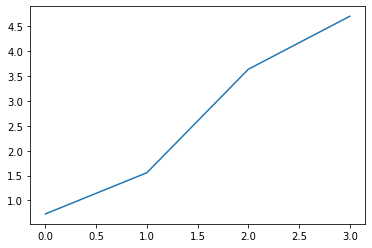

In [31]:
df_res['error'].plot()

In [32]:
mse = mean_squared_error(df_res['Actual'] , df_res['Predictions'])
mse, np.sqrt(mse)

(9.558118298433797, 3.0916206588832655)

<AxesSubplot:>

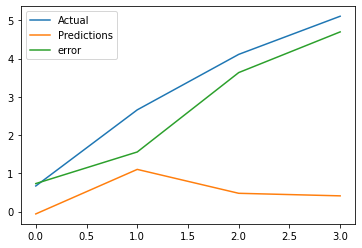

In [33]:
df_res.plot()